# OUTLIER

### Pengertian Outlier

Outlier adalah data yang menyimpang secara signifikan dari mayoritas data lain dalam suatu dataset. Kehadiran outlier dapat muncul karena berbagai alasan, seperti kesalahan pengukuran, kesalahan pencatatan, atau memang fenomena yang jarang terjadi namun sah. Dalam analisis data, outlier penting dikenali karena dapat memengaruhi hasil perhitungan statistik seperti rata-rata, standar deviasi, atau model prediksi. Data yang normal atau inlier mengikuti pola umum dataset, sementara outlier menunjukkan nilai yang jauh berbeda dan sering kali membutuhkan perhatian khusus, baik untuk diperbaiki, dihapus, atau dianalisis lebih lanjut sebagai informasi yang potensial bernilai.

### Identifikasi Outlier

Berikut ini adalah tahap Data Understanding untuk dataset Iris, termasuk pembacaan data, eksplorasi awal, encoding kolom kategori, serta identifikasi outlier pada setiap fitur numerik menggunakan metode IQR (Interquartile Range).

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Baca dataset CSV
df = pd.read_csv("IRIS.csv")

print("Shape:", df.shape)
display(df.head())
df.info()
display(df.describe())


if 'Class' in df.columns:
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

def detect_outlier_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[feature + '_outlier'] = ((df[feature] < lower) | (df[feature] > upper)).astype(int)

for col in numerical_features:
    detect_outlier_iqr(df, col)

display(df.head())


ModuleNotFoundError: No module named 'pandas'

Penjelasan singkat kode di atas:

- Membaca dataset
Kode pd.read_csv("IRIS.csv") digunakan untuk membaca file dataset Iris dalam format CSV ke dalam objek DataFrame df. Setelah itu, fungsi df.shape, df.head(), df.info(), dan df.describe() digunakan untuk menampilkan informasi dasar, cuplikan data, tipe data tiap kolom, dan ringkasan statistik numerik.

- Encoding kolom kategori
Jika terdapat kolom Class (yang berisi kategori nama spesies), kolom ini diubah menjadi representasi numerik menggunakan LabelEncoder. Ini penting agar kolom kategori bisa diproses dalam analisis data selanjutnya.

- Pemilihan fitur numerik
Dengan select_dtypes, hanya kolom dengan tipe numerik (float64 atau int64) yang diambil untuk analisis outlier. Hal ini dilakukan karena metode IQR hanya relevan untuk data numerik.

- Identifikasi outlier menggunakan IQR
Fungsi detect_outlier_iqr menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) setiap kolom numerik, kemudian menentukan rentang interkuartil (IQR = Q3 - Q1). Data yang berada di luar batas Q1 - 1.5*IQR (bawah) dan Q3 + 1.5*IQR (atas) dianggap outlier.
a. Nilai outlier diberi label 1
b. Nilai normal diberi label 0
Hasilnya ditambahkan sebagai kolom baru dengan nama nama_kolom_outlier.

- Penerapan untuk seluruh kolom numerik
Loop for col in numerical_features menerapkan fungsi deteksi outlier ke semua fitur numerik sekaligus, sehingga setiap kolom memiliki kolom outlier masing-masing.

- Tampilan akhir
display(df.head()) menampilkan dataset dengan tambahan kolom outlier, sehingga memudahkan visualisasi dan analisis data abnormal lebih lanjut.

### Grafik Distribusi Outlier

Grafik ini akan menunjukkan persebaran outlier did alam dataset

In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


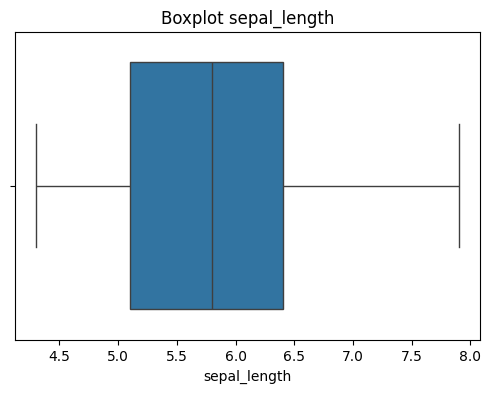

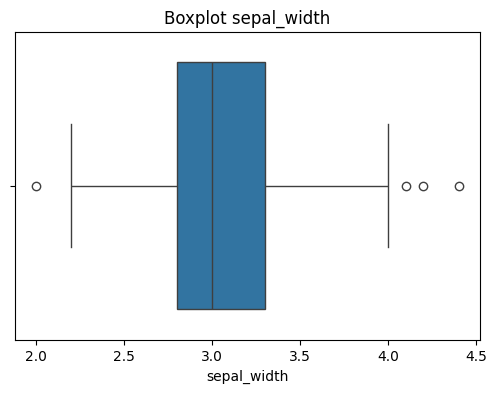

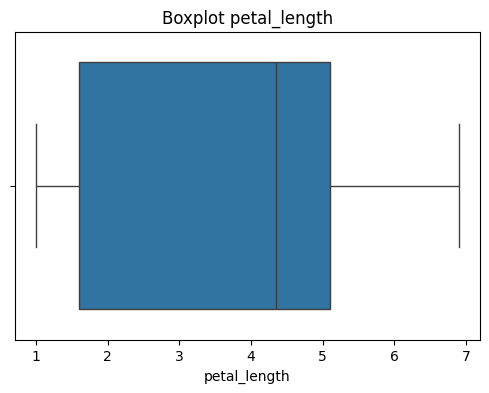

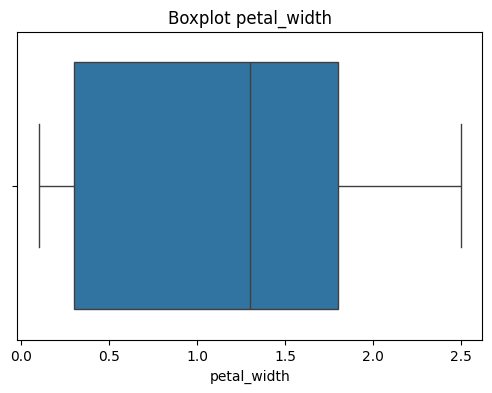

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()


Boxplot akan menampilkan median, kuartil, dan outlier secara visual. Outlier yang terdeteksi dengan IQR akan muncul sebagai titik di luar “kotak”.

### Histogram Distribusi Data

Histogram membantu melihat sebaran data dan apakah ada skew atau anomali.

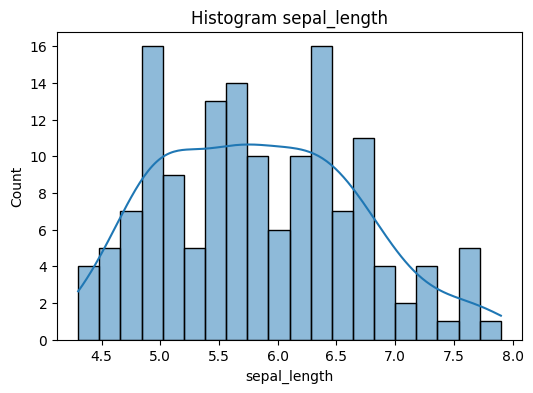

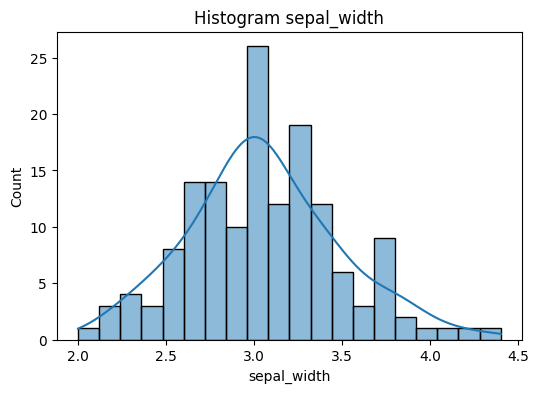

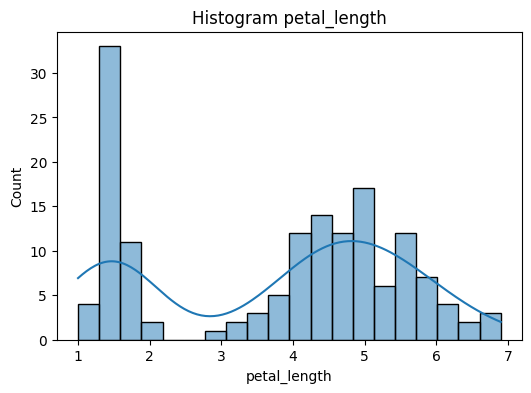

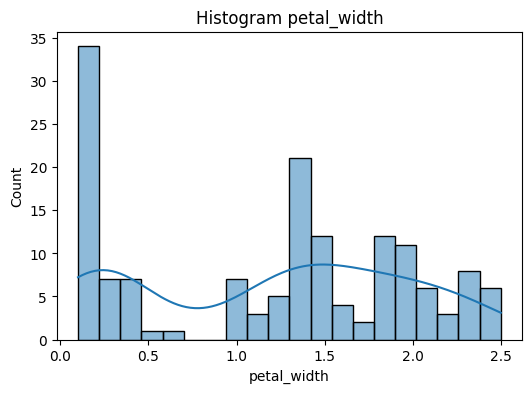

In [6]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram {col}')
    plt.show()


### Jumlah Outlier per Batang

In [7]:
outlier_counts = {col: df[col + '_outlier'].sum() for col in numerical_features}
print("Jumlah outlier per kolom:")
for k, v in outlier_counts.items():
    print(f"{k}: {v}")


Jumlah outlier per kolom:
sepal_length: 0
sepal_width: 4
petal_length: 0
petal_width: 0


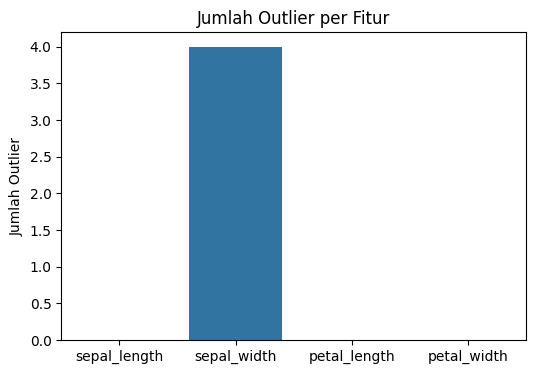

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
plt.title("Jumlah Outlier per Fitur")
plt.ylabel("Jumlah Outlier")
plt.show()


### Korelasi Antar Fitur

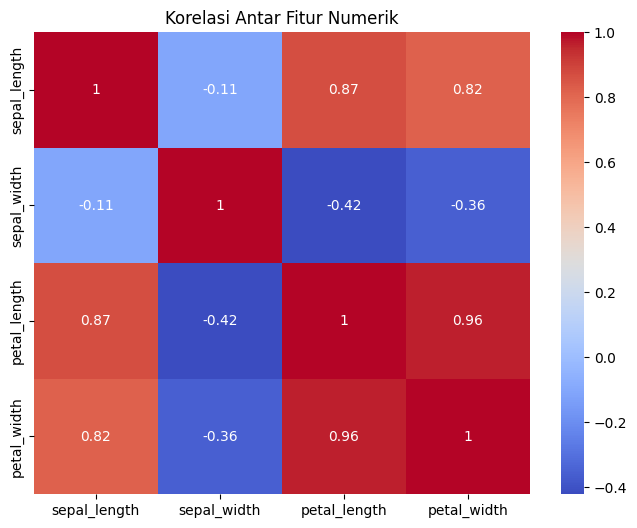

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()
